Enter number of processes: 3
Enter arrival time for P1: 2
Enter burst time for P1: 3
Enter arrival time for P2: 2
Enter burst time for P2: 4
Enter arrival time for P3: 7
Enter burst time for P3: 1

Process	Arrival	Burst	Waiting	Turnaround
P1	2	3	0	3
P2	2	4	3	7
P3	7	1	2	3


<ipython-input-4-4388ee62ab62>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n)


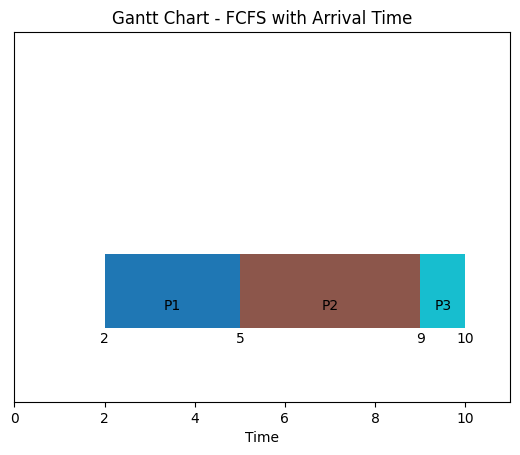

In [4]:
import matplotlib.pyplot as plt

n = int(input("Enter number of processes: "))
processes = [f'P{i+1}' for i in range(n)]
burst_times = []
arrival_times = []

for i in range(n):
    at = int(input(f"Enter arrival time for {processes[i]}: "))
    bt = int(input(f"Enter burst time for {processes[i]}: "))
    arrival_times.append(at)
    burst_times.append(bt)

info = sorted(zip(processes, arrival_times, burst_times), key=lambda x: x[1])
processes, arrival_times, burst_times = zip(*info)

start_times = []
waiting_times = []
turnaround_times = []

current_time = 0

for i in range(n):
    if current_time < arrival_times[i]:
        current_time = arrival_times[i]
    start_times.append(current_time)
    waiting_times.append(current_time - arrival_times[i])
    current_time += burst_times[i]
    turnaround_times.append(current_time - arrival_times[i])

print("\nProcess\tArrival\tBurst\tWaiting\tTurnaround")
for i in range(n):
    print(f"{processes[i]}\t{arrival_times[i]}\t{burst_times[i]}\t{waiting_times[i]}\t{turnaround_times[i]}")

fig, gnt = plt.subplots()
gnt.set_ylim(0, 50)
gnt.set_xlim(0, max(start_times[i] + burst_times[i] for i in range(n)) + 1)
gnt.set_xlabel('Time')
gnt.set_yticks([])
gnt.set_title('Gantt Chart - FCFS with Arrival Time')

colors = plt.cm.get_cmap('tab10', n)

for i in range(n):
    gnt.broken_barh([(start_times[i], burst_times[i])], (10, 10), facecolors=colors(i))
    gnt.text(start_times[i] + burst_times[i]/2, 13, processes[i], ha='center', va='center')
    gnt.text(start_times[i], 8, str(start_times[i]), ha='center')
gnt.text(start_times[-1] + burst_times[-1], 8, str(start_times[-1] + burst_times[-1]), ha='center')

plt.show()
